In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
# to set the executable path
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Visit the Mars NASA news site/instruct the browser to visit it.
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

html = browser.html
html_soup = soup(html, 'html.parser')

In [4]:
# to find the table/class which you are scraping the "data"!! 
table = html_soup.find_all('tr', class_='data-row')

In [5]:
# 2 Scrape the data in the HTML table

mars_temp = []
for row in table:
    row_data = row.find_all('td')
    row_datan = [col.text for col in row_data]    
    mars_temp.append(row_datan)
print(mars_temp)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [6]:
mars_temp_df = pd.DataFrame(mars_temp, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']) 
mars_temp_df.head(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


In [7]:
mars_temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [8]:
# convert an Object (string) column to to_datetime : terrestrial_date
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])
mars_temp_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                         object
ls                          object
month                       object
min_temp                    object
pressure                    object
dtype: object

In [9]:
# convert an Object (string) column to int or float: 
mars_temp_df = mars_temp_df.astype({'id': 'int', 'sol': 'int', 'ls': 'int', 'month': 'int'})
print(mars_temp_df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                    object
pressure                    object
dtype: object


In [10]:
mars_temp_df = mars_temp_df.astype({'min_temp': 'float', 'pressure': 'float'})
print(mars_temp_df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [11]:
# How many months exist on Mars?
dfm = mars_temp_df.groupby(['month'])['month'].count()
print(dfm)

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64


In [12]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
dfs = mars_temp_df['sol'].count()
print(dfs)

1867


In [13]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
# Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

temp_months = mars_temp_df.groupby(['month'])['min_temp'].mean()
temp_months_df = pd.DataFrame(temp_months)
temp_months_df

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


In [14]:
temp_months.min()

-83.30729166666667

In [15]:
temp_months.max()

-68.38297872340425

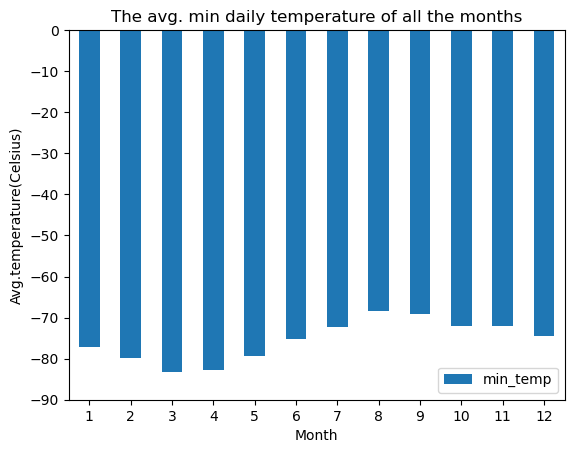

In [16]:
temp_months_df.plot.bar(y = "min_temp", rot =0)
plt.ylim(-90,0)
plt.xlabel("Month")
plt.ylabel("Avg.temperature(Celsius)")
plt.title("The avg. min daily temperature of all the months")
plt.legend()
plt.savefig("results/min_tem.png")
plt.show()

In [17]:
# Which months have the lowest and the highest atmospheric pressure on Mars? 
# Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
press_months = mars_temp_df.groupby(['month'])['pressure'].mean()
press_months_df = pd.DataFrame(press_months)
press_months_df


,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [18]:
press_months.min()

745.0544217687075

In [19]:
press_months.max()

913.3059701492538

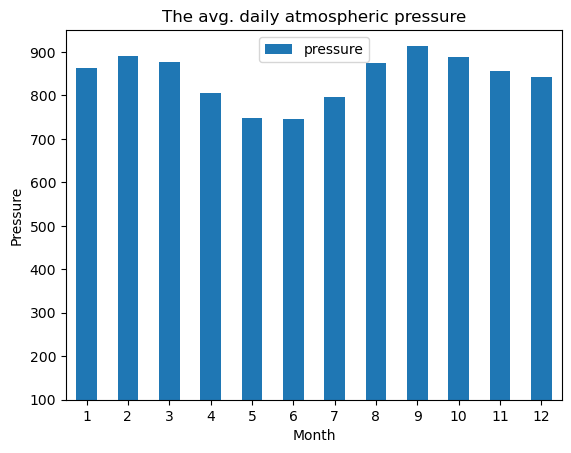

In [20]:
press_months_df.plot.bar(y = "pressure", rot =0)
plt.ylim(100,950)
plt.xlabel("Month")
plt.ylabel("Pressure")
plt.title("The avg. daily atmospheric pressure")
plt.legend()
plt.savefig("results/pressure.png")
plt.show()


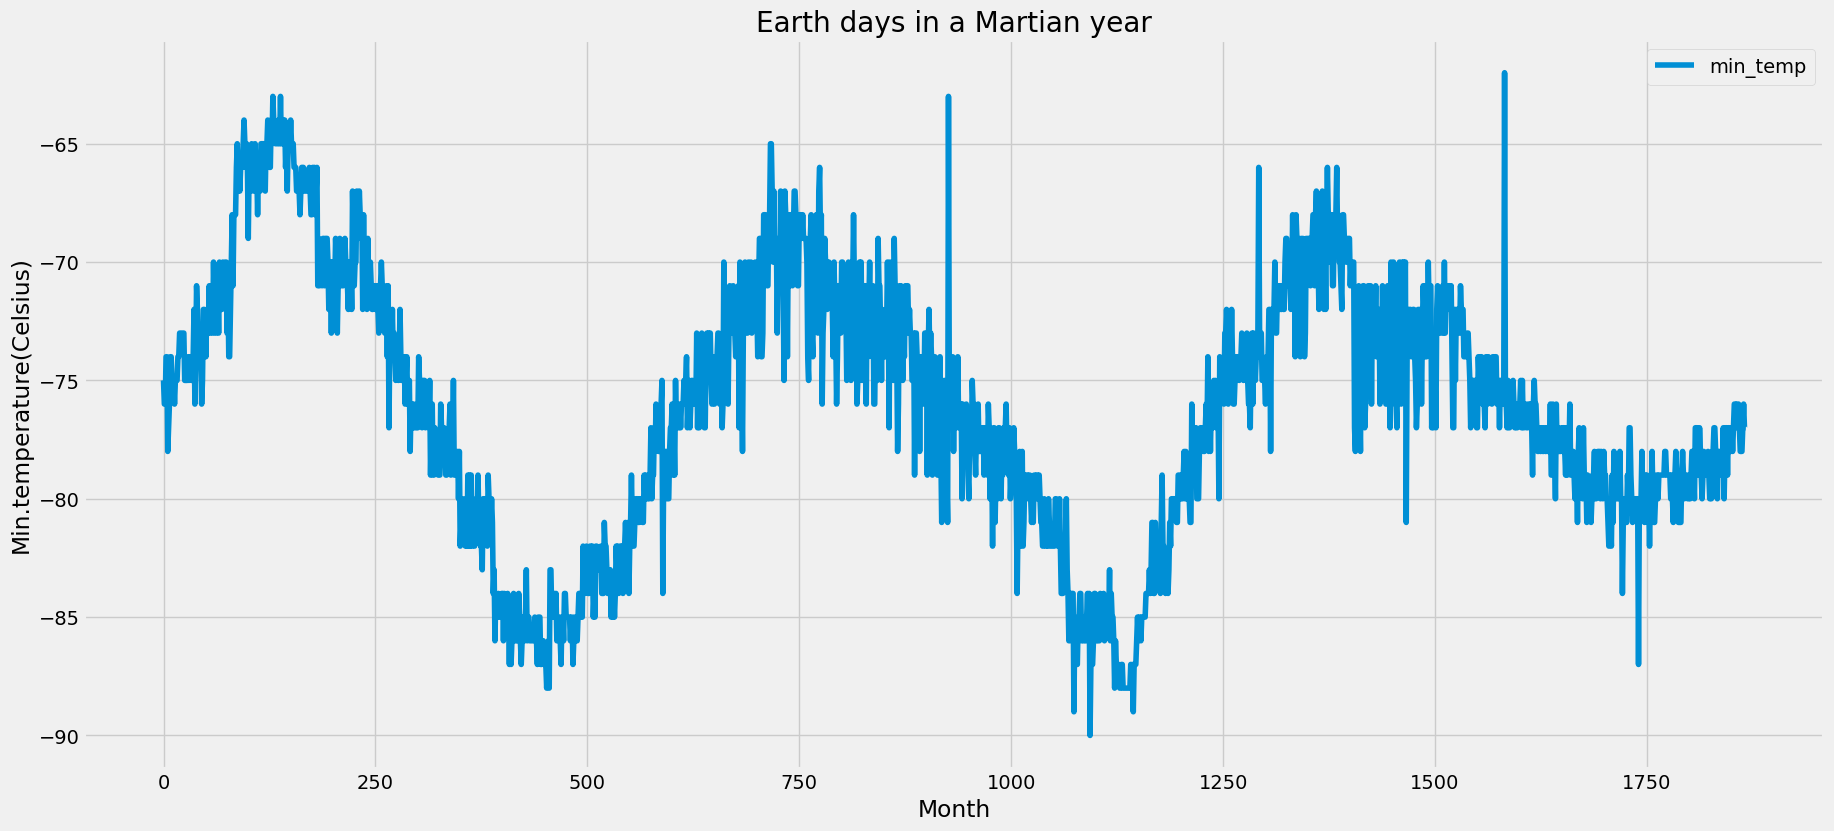

In [21]:
# About how many terrestrial (Earth) days exist in a Martian year? 
# That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
# Visually estimate the result by plotting the daily minimum temperature.

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Plot DataFrame using the df.plot() 
earthd = mars_temp_df.plot(y = 'min_temp', figsize = (20,9))   
earthd.set_title("Earth days in a Martian year")
earthd.set_xlabel("Month")
earthd.set_ylabel("Min.temperature(Celsius)")

plt.savefig("results/earth_days.png",bbox_inches='tight')
plt.show()


In [22]:
# Export the DataFrame to a CSV file.
mars_temp_df.to_csv("results/mars_temp.csv", index=False)

In [23]:
browser.quit()